In [103]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [104]:
# Load data

df = pd.read_csv('data/case study combined.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24552 entries, 0 to 24551
Data columns (total 17 columns):
ticket id                24552 non-null int64
customer type            24267 non-null object
hour ticket created      24552 non-null int64
created date             24552 non-null object
solved date              24552 non-null object
agent wait time          24552 non-null float64
assign time              24552 non-null float64
first reply time         24552 non-null float64
first resolution time    24552 non-null float64
full resolution time     24552 non-null float64
private comments         24552 non-null int64
public comments          24552 non-null int64
agent stations           24552 non-null int64
reopens                  24552 non-null int64
replies                  24552 non-null int64
satisfaction             24552 non-null int64
Wrap Up Code             24552 non-null object
dtypes: float64(5), int64(8), object(4)
memory usage: 3.2+ MB


In [105]:
# Explore datatypes
df.dtypes

ticket id                  int64
customer type             object
hour ticket created        int64
created date              object
solved date               object
agent wait time          float64
assign time              float64
first reply time         float64
first resolution time    float64
full resolution time     float64
private comments           int64
public comments            int64
agent stations             int64
reopens                    int64
replies                    int64
satisfaction               int64
Wrap Up Code              object
dtype: object

In [106]:
# Explore data
df.head()

,ticket id,customer type,hour ticket created,created date,solved date,agent wait time,assign time,first reply time,first resolution time,full resolution time,private comments,public comments,agent stations,reopens,replies,satisfaction,Wrap Up Code
0,803178,Couple,17,08/13/2019,09/04/2019,14.0,0.0,28430.0,31536.0,31572.0,4,7,1,1,3,1,Proactive Outreach
1,732468,Guest,16,06/14/2019,06/27/2019,2.0,0.0,18527.0,18527.0,18527.0,10,2,1,0,1,1,Registry
2,705148,Couple,17,05/22/2019,06/04/2019,0.0,0.0,17190.0,14326.0,18738.0,4,6,1,3,2,1,Registry
3,611418,Couple,13,02/15/2019,02/25/2019,0.0,0.0,14523.0,0.0,14523.0,6,2,1,2,1,0,Registry
4,619896,Guest,13,02/26/2019,03/07/2019,0.0,0.0,12933.0,8730.0,13411.0,5,4,1,2,2,0,Registry


In [107]:
df.tail()

,ticket id,customer type,hour ticket created,created date,solved date,agent wait time,assign time,first reply time,first resolution time,full resolution time,private comments,public comments,agent stations,reopens,replies,satisfaction,Wrap Up Code
24547,819639,NaN,7,08/28/2019,08/28/2019,0.0,13.0,0.0,13.0,13.0,0,1,1,0,0,0,Miscellaneous
24548,819703,Guest,9,08/28/2019,08/28/2019,0.0,83.0,0.0,83.0,83.0,0,1,1,0,0,0,Miscellaneous
24549,824950,Couple,16,09/02/2019,09/02/2019,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,Registry
24550,825973,Guest,13,09/03/2019,09/03/2019,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,Registry
24551,826477,Couple,17,09/03/2019,09/03/2019,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,Registry


In [108]:
# Rename one or more columns to remove spaces
df.rename(columns={'ticket id':'ticket_id', 'customer type':'customer_type', 'hour ticket created':'hour_ticket_created'}, inplace = True);

In [109]:
df.rename(columns={'created date':'created_date', 'solved date':'solved_date', 'agent wait time':'agent_wait_time'}, inplace = True);

In [110]:
df.rename(columns={'assign time':'assign_time', 'first reply time':'first_reply_time', 'first resolution time':'first_resolution_time'}, inplace = True);

In [111]:
df.rename(columns={'private comments':'private comments', 'public comments':'public_comments', 'agent stations':'agent_stations'}, inplace = True);

In [171]:
df.rename(columns={'Wrap Up Code':'wrap_up_code','full resolution time':'full_resolution_time', 'private comments':'private_comments'}, inplace = True);

In [172]:
df.columns

Index(['hour_ticket_created', 'created_date', 'solved_date', 'agent_wait_time',
       'assign_time', 'first_reply_time', 'first_resolution_time',
       'full_resolution_time', 'private_comments', 'public_comments',
       'agent_stations', 'reopens', 'replies', 'satisfaction',
       'customer_type_Guest', 'wrap_up_code_Hot Topic',
       'wrap_up_code_Invitations', 'wrap_up_code_Legal/Copyright',
       'wrap_up_code_Miscellaneous', 'wrap_up_code_Proactive Emails',
       'wrap_up_code_Proactive Outreach', 'wrap_up_code_Real Weddings',
       'wrap_up_code_Registry', 'wrap_up_code_Registry Advisor',
       'wrap_up_code_Tech Issues', 'wrap_up_code_Weddings'],
      dtype='object')

In [114]:
# Clean up any datatypes
from datetime import datetime
df['created_date'] = pd.to_datetime(df.created_date)

In [115]:
df['solved_date'] = pd.to_datetime(df.solved_date)

In [116]:
df.dtypes

ticket_id                         int64
customer_type                    object
hour_ticket_created               int64
created_date             datetime64[ns]
solved_date              datetime64[ns]
agent_wait_time                 float64
assign_time                     float64
first_reply_time                float64
first_resolution_time           float64
full resolution time            float64
private comments                  int64
public_comments                   int64
agent_stations                    int64
reopens                           int64
replies                           int64
satisfaction                      int64
wrap_up_code                     object
dtype: object

ticket_id                  0
customer_type            285
hour_ticket_created        0
created_date               0
solved_date                0
agent_wait_time            0
assign_time                0
first_reply_time           0
first_resolution_time      0
full resolution time       0
private comments           0
public_comments            0
agent_stations             0
reopens                    0
replies                    0
satisfaction               0
wrap_up_code               0
dtype: int64


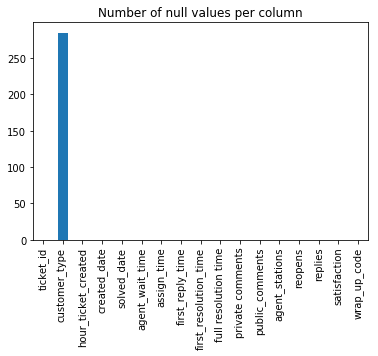

In [117]:
# Count the missing values in each column
print((df.isnull().sum()))

df.isnull().sum().plot(kind='bar');
plt.title('Number of null values per column');

In [118]:
# get rid of N/A values in customer type
df.dropna(inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24267 entries, 0 to 24551
Data columns (total 17 columns):
ticket_id                24267 non-null int64
customer_type            24267 non-null object
hour_ticket_created      24267 non-null int64
created_date             24267 non-null datetime64[ns]
solved_date              24267 non-null datetime64[ns]
agent_wait_time          24267 non-null float64
assign_time              24267 non-null float64
first_reply_time         24267 non-null float64
first_resolution_time    24267 non-null float64
full resolution time     24267 non-null float64
private comments         24267 non-null int64
public_comments          24267 non-null int64
agent_stations           24267 non-null int64
reopens                  24267 non-null int64
replies                  24267 non-null int64
satisfaction             24267 non-null int64
wrap_up_code             24267 non-null object
dtypes: datetime64[ns](2), float64(5), int64(8), object(2)
memory usage: 3.3+ M

In [120]:
df.describe(include='all')

,ticket_id,customer_type,hour_ticket_created,created_date,solved_date,agent_wait_time,assign_time,first_reply_time,first_resolution_time,full resolution time,private comments,public_comments,agent_stations,reopens,replies,satisfaction,wrap_up_code
count,24267.000000,24267,24267.000000,24267,24267,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267
unique,NaN,2,NaN,248,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,Couple,NaN,2019-06-11 00:00:00,2019-06-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registry
freq,NaN,13060,NaN,186,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18251
first,NaN,NaN,NaN,2019-01-01 00:00:00,2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-09-05 00:00:00,2019-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,704497.731405,NaN,14.243747,NaN,NaN,136.576709,428.262332,543.621296,824.703795,1473.993942,0.634730,3.365888,1.035521,0.669345,1.521902,0.923765,NaN
std,73279.517176,NaN,5.069862,NaN,NaN,653.098835,537.678539,825.976101,1595.970845,2434.881291,1.403864,2.178511,0.211686,0.890781,1.145931,0.265380,NaN
min,579891.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,640293.000000,NaN,11.000000,NaN,NaN,0.000000,8.000000,23.000000,25.000000,83.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,NaN


In [121]:
# Convert any non-numeric attributes to numbers with getdummies
df = pd.get_dummies(df, columns=['customer_type', 'wrap_up_code'], drop_first=True)

In [122]:
df.dtypes

ticket_id                                   int64
hour_ticket_created                         int64
created_date                       datetime64[ns]
solved_date                        datetime64[ns]
agent_wait_time                           float64
assign_time                               float64
first_reply_time                          float64
first_resolution_time                     float64
full resolution time                      float64
private comments                            int64
public_comments                             int64
agent_stations                              int64
reopens                                     int64
replies                                     int64
satisfaction                                int64
customer_type_Guest                         uint8
wrap_up_code_Hot Topic                      uint8
wrap_up_code_Invitations                    uint8
wrap_up_code_Legal/Copyright                uint8
wrap_up_code_Miscellaneous                  uint8


In [135]:
#set ticket_id as index
df.set_index('ticket_id', inplace=True)

In [136]:
df.columns

Index(['hour_ticket_created', 'created_date', 'solved_date', 'agent_wait_time',
       'assign_time', 'first_reply_time', 'first_resolution_time',
       'full resolution time', 'private comments', 'public_comments',
       'agent_stations', 'reopens', 'replies', 'satisfaction',
       'customer_type_Guest', 'wrap_up_code_Hot Topic',
       'wrap_up_code_Invitations', 'wrap_up_code_Legal/Copyright',
       'wrap_up_code_Miscellaneous', 'wrap_up_code_Proactive Emails',
       'wrap_up_code_Proactive Outreach', 'wrap_up_code_Real Weddings',
       'wrap_up_code_Registry', 'wrap_up_code_Registry Advisor',
       'wrap_up_code_Tech Issues', 'wrap_up_code_Weddings'],
      dtype='object')

In [125]:
# Look at correlation
corr = df.corr()

In [126]:
corr['satisfaction']

ticket_id                         -0.013900
hour_ticket_created               -0.004198
agent_wait_time                   -0.143335
assign_time                       -0.029197
first_reply_time                  -0.054476
first_resolution_time             -0.039766
full resolution time              -0.287666
private comments                  -0.163681
public_comments                   -0.123894
agent_stations                    -0.053026
reopens                           -0.247668
replies                           -0.172029
satisfaction                       1.000000
customer_type_Guest                0.027213
wrap_up_code_Hot Topic             0.012816
wrap_up_code_Invitations          -0.034876
wrap_up_code_Legal/Copyright      -0.039153
wrap_up_code_Miscellaneous        -0.010533
wrap_up_code_Proactive Emails     -0.008033
wrap_up_code_Proactive Outreach    0.007144
wrap_up_code_Real Weddings        -0.016383
wrap_up_code_Registry              0.065943
wrap_up_code_Registry Advisor   

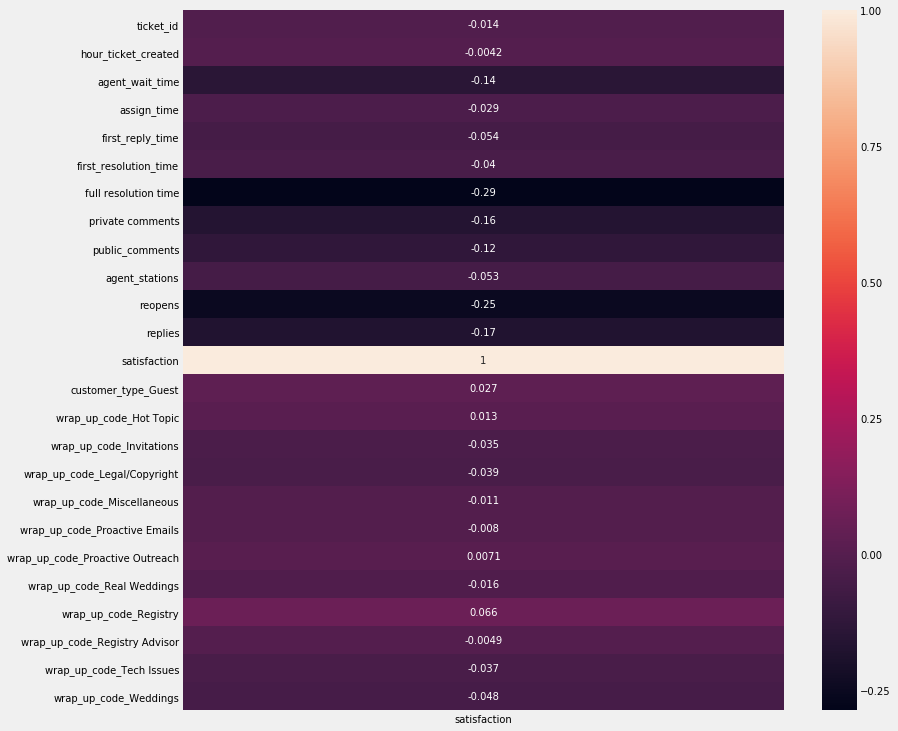

In [165]:
sns.heatmap(corr[['satisfaction']], annot=True)

In [167]:
# plot the data to see some initial insignts
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 10

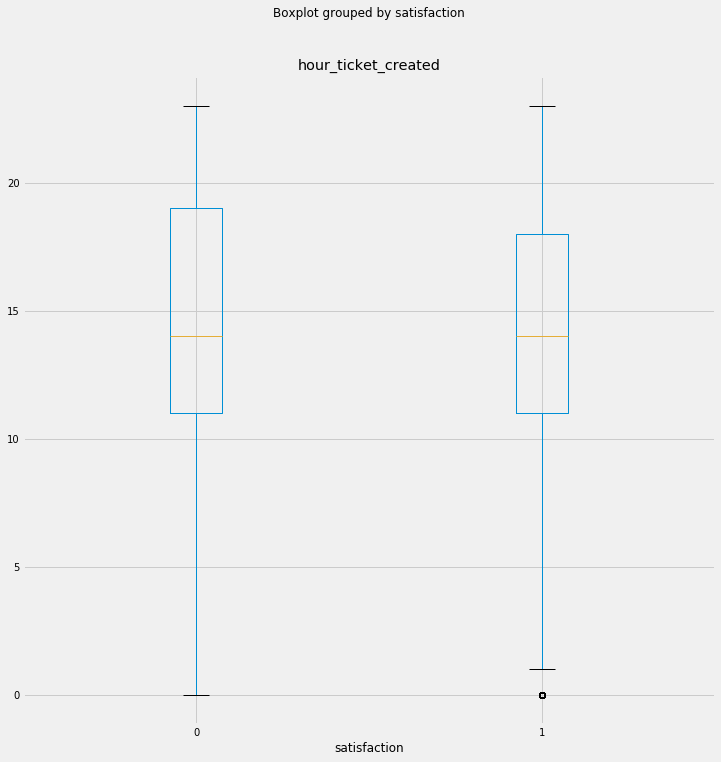

In [168]:
#look at boxplot of hour_ticket_created
df.boxplot(column=['hour_ticket_created'],by='satisfaction')

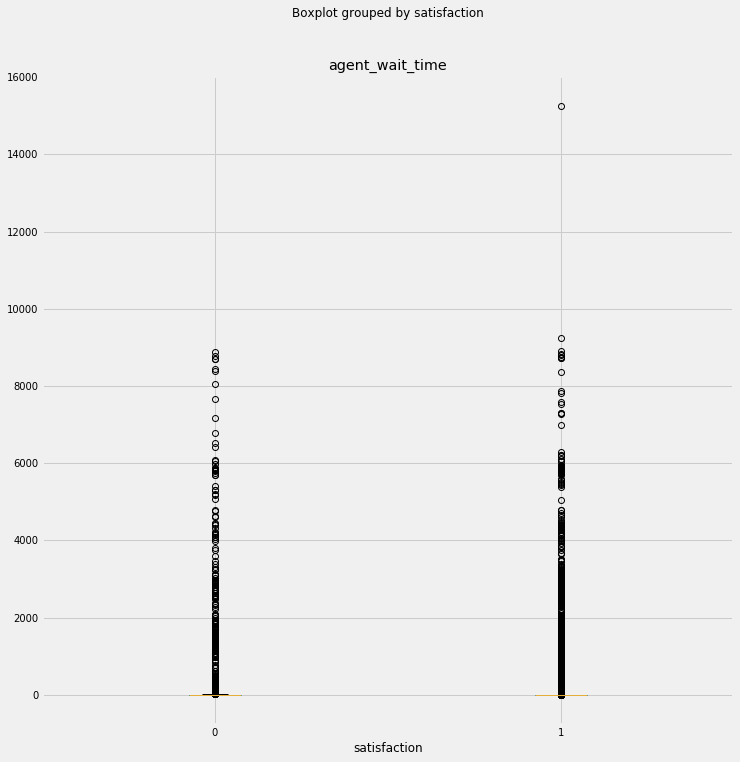

In [169]:
#look at boxplot of agent_wait_time
df.boxplot(column=['agent_wait_time'],by='satisfaction')

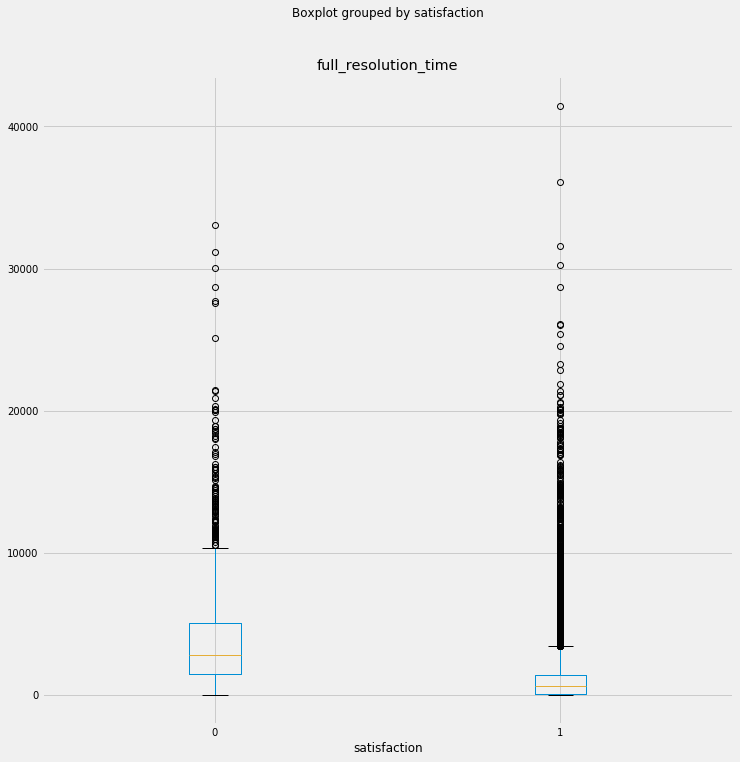

In [173]:
#look at boxplot of full_resolution_time
df.boxplot(column=['full_resolution_time'],by='satisfaction')

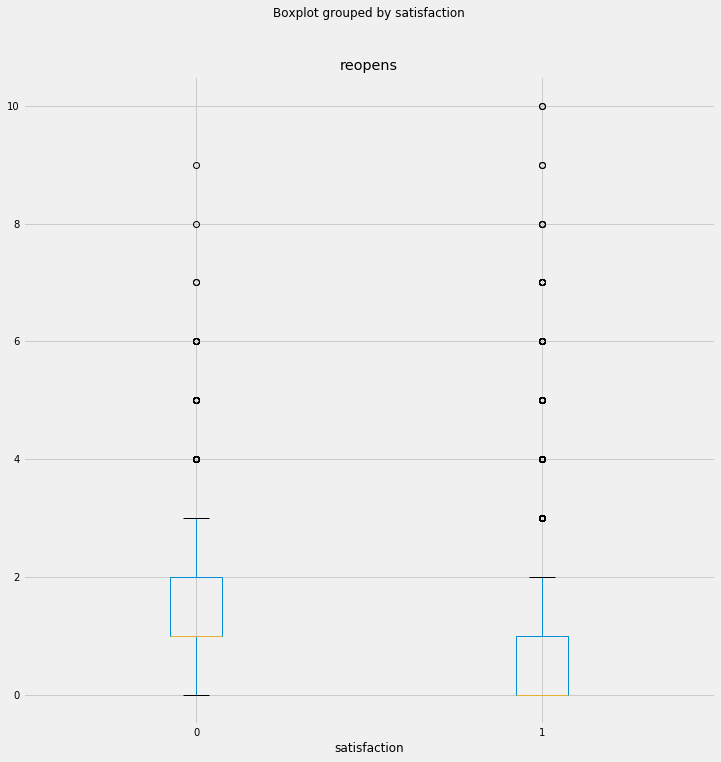

In [174]:
#look at boxplot of reopens
df.boxplot(column=['reopens'],by='satisfaction')

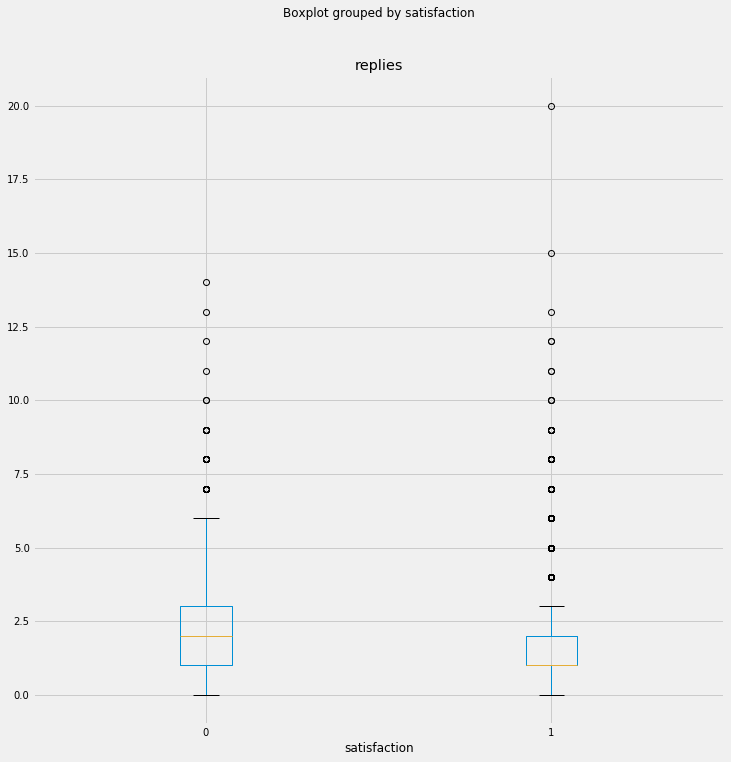

In [175]:
#look at boxplot of replies
df.boxplot(column=['replies'],by='satisfaction')

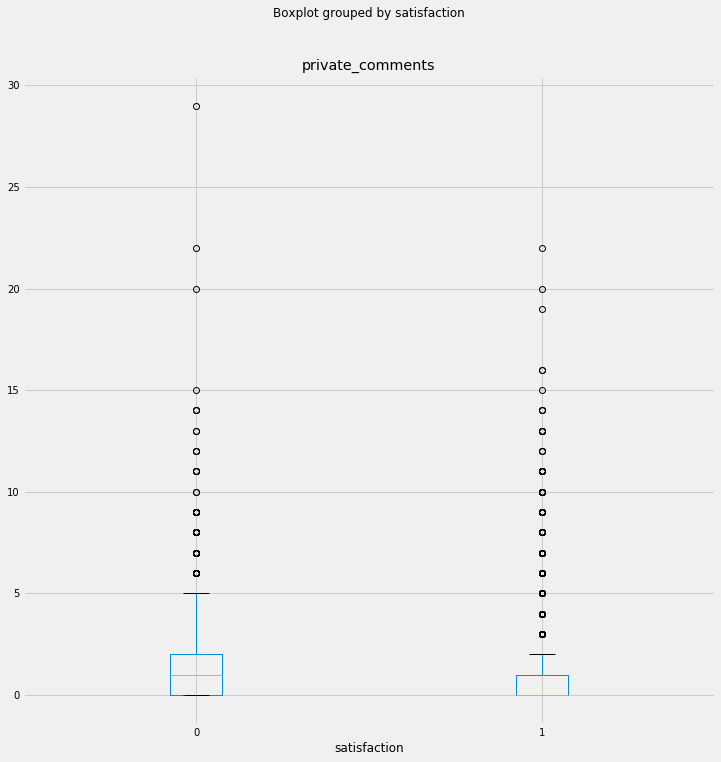

In [176]:
#look at boxplot of private_comments
df.boxplot(column=['private_comments'],by='satisfaction')

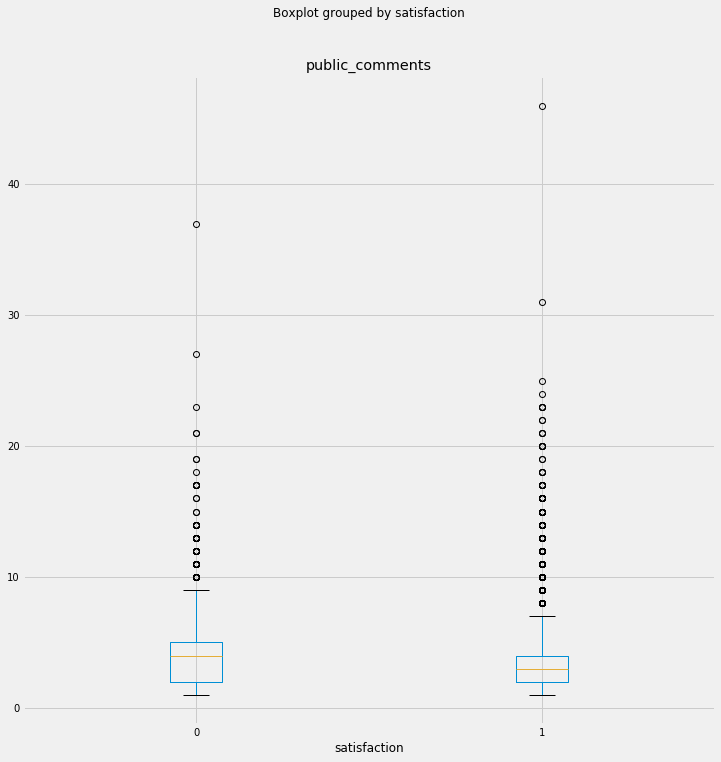

In [177]:
#look at boxplot of fpublic_comments
df.boxplot(column=['public_comments'],by='satisfaction')

In [ ]:
df.boxplot(column=['hour_ticket_created'],by='satisfaction')